# Real Estate Market Analysis

# 1) Show me the market trends to help me decide. Which US real-estate market is doing best overall. 10 points (**Matt Henning**)

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# Load datasets
zhvi_data = pd.read_csv('ZHVI_Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv')
zori_data = pd.read_csv('ZORI_Metro_zordi_uc_sfr_month.csv')
market_temp_data = pd.read_csv('MARKET_TEMP_Metro_market_temp_index_uc_sfrcondo_month.csv')
dttp_data = pd.read_csv('DTTP_Metro_mean_doz_pending_uc_sfrcondo_month.csv')
inventory_data = pd.read_csv('FOR_SALE_INVENTORY_Metro_invt_fs_uc_sfr_sm_month.csv')

# Display data to ensure it loaded
zhvi_data.head(), zori_data.head(), market_temp_data.head(), dttp_data.head(), inventory_data.head()
# Reshape datasets for 2023-2024
def reshape_and_filter(df, id_vars, value_name, start_year=2023, end_year=2024):
    df_long = df.melt(id_vars=id_vars, var_name="Date", value_name=value_name)
    df_long["Date"] = pd.to_datetime(df_long["Date"], errors="coerce")
    return df_long[
        (df_long["Date"].dt.year >= start_year) & (df_long["Date"].dt.year <= end_year)
    ]

FileNotFoundError: [Errno 2] No such file or directory: 'ZHVI_Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv'

## Which US Real Estate Market is Doing Best Overall?

In [ ]:
# Extract the latest data for analysis, rename for zhvi and zori to clarify and tracking
zhvi_latest = zhvi_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'ZHVI_Latest'})
zori_latest = zori_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'ZORI_Latest'})
market_temp_latest = market_temp_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'MarketTemp_Latest'})

# Merge datasets, merging the zhvi and zori for region and state, makes it more clear and remove united states as a region
combined_data = pd.merge(zhvi_latest, zori_latest, on=['RegionName', 'StateName'], how='inner')
combined_data = pd.merge(combined_data, market_temp_latest, on=['RegionName', 'StateName'], how='inner')

# Rank markets by metrics, metrics being "hottest" by state/region 
combined_data['ZHVI_Rank'] = combined_data['ZHVI_Latest'].rank(ascending=False)
combined_data['ZORI_Rank'] = combined_data['ZORI_Latest'].rank(ascending=False)
combined_data['MarketTemp_Rank'] = combined_data['MarketTemp_Latest'].rank(ascending=False)

# Calculate overall rank
combined_data['Overall_Rank'] = combined_data[['ZHVI_Rank', 'ZORI_Rank', 'MarketTemp_Rank']].mean(axis=1)

# Top-performing markets
top_markets = combined_data.sort_values(by='Overall_Rank').head(10)
top_markets

### **ZHVI_Latest**
- **Definition**:  
  The Zillow Home Value Index (ZHVI) for the most recent period (**October 2024**).

- **Purpose**:  
  ZHVI provides an average property value (home price) within a region.
  - **Price Appreciation**: How property values have grown over time.
  - **Market Demand**: Higher ZHVI values indicate a stronger demand for housing in that area.

---

### **ZORI_Latest**
- **Definition**:  
  The Zillow Observed Rent Index (ZORI) for the most recent period (**October 2024**).

- **Purpose**:  
  ZORI tracks the average rent prices across a region. 
  - **Rental Yields**: Comparing rental income to property prices.
  - **Profitability for Landlords**: Higher ZORI values mean higher rental income potential.

---

### **How These Columns Were Created**
These columns were extracted and renamed from the original datasets to make them easier to understand and work with:

- **ZHVI_Latest** is derived from the ZHVI dataset (`zhvi_data`).
- **ZORI_Latest** is derived from the ZORI dataset (`zori_data`).
- The renaming ensures clarity in tracking the most recent metrics.


### **Why They Matter**

Together, **ZHVI** and **ZORI** provide a comprehensive view of a real estate market:

- **ZHVI** helps evaluate appreciation potential and market strength.
- **ZORI** indicates rental income potential and profitability for rental investments.
- Comparing the two allows investors to identify markets with both rising property values and strong rental returns.


### Visualization of Top 10 Performing Markets

In [ ]:

# Bar chart for overall rank
plt.figure(figsize=(10, 6))
plt.barh(top_markets['RegionName'], top_markets['Overall_Rank'], color='green')
plt.xlabel('Overall Rank')
plt.ylabel('Region')
plt.title('Top 10 Performing Real Estate Markets')
plt.gca().invert_yaxis()
plt.show()

### **Bar Chart: Top 10 Performing Real Estate Markets**

### **Why Lower Overall Rank Is Better**

- **Higher Performance Across Metrics**:  
  A lower overall rank means the market consistently excels in the evaluated areas:
  - **Price Growth (ZHVI)**
  - **Rental Returns (ZORI)**
  - **Competitiveness (Market Activity)**

- **Comparative Ranking**:  
  The system ranks markets relative to one another. For example:
  - A market with **Rank 1 for ZHVI**, **Rank 2 for ZORI**, and **Rank 1 for Market Activity** has an **average overall rank of 1.33**, making it highly competitive.
  - A market with **Rank 5, Rank 6, and Rank 7** has an **average overall rank of 6.0**, indicating lower performance compared to the first market.

---

### **Insight 1**
- **San Jose, CA**:  
  If it has the lowest overall rank, it likely performs exceptionally well in price appreciation and market activity, even if its rental yields are moderate.
  
- **Springfield, MA**:  
  If it has a higher overall rank, it might perform well in rental yields but less so in price appreciation or market activity.


### **Insight 2**:
- Markets like **San Jose, CA** and **San Francisco, CA** rank highly due to their strong price appreciation, despite relatively moderate rental yields.
- **Salinas, CA** and **Manchester, NH** offer a mix of competitive rental yields and moderate market activity, making them attractive for investors looking for balanced opportunities.


In [ ]:
import matplotlib.pyplot as plt

# Extract trends for top market regions from zhvi
top_market_regions = top_markets['RegionName'].unique()
zhvi_trends = zhvi_data[zhvi_data['RegionName'].isin(top_market_regions)]

# Transpose data for plotting (columns as dates, rows as regions)
zhvi_trends = zhvi_trends.set_index('RegionName').drop(['RegionID', 'SizeRank', 'RegionType', 'StateName'], axis=1).T
zhvi_trends.index = pd.to_datetime(zhvi_trends.index)  # Convert dates to datetime for better plotting

# Filter for October 2023 to October 2024
start_date = "2023-10-01"
end_date = "2024-10-31"
zhvi_trends = zhvi_trends[(zhvi_trends.index >= start_date) & (zhvi_trends.index <= end_date)]

# Plot the trends
plt.figure(figsize=(12, 8))
for region in zhvi_trends.columns:
    plt.plot(zhvi_trends.index, zhvi_trends[region], label=region)

plt.title("Home Value Trends (ZHVI) for Top Performing Markets (Oct 2023 - Oct 2024)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("ZHVI (Home Value Index)", fontsize=12)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()


In [ ]:
# Filter for October 2023 to October 2024
start_date = "2023-10-01"
end_date = "2024-10-31"
zhvi_trends = zhvi_trends[(zhvi_trends.index >= start_date) & (zhvi_trends.index <= end_date)]

# Calculate the median home price for each region in the date range
median_home_price = zhvi_trends.median().sort_values(ascending=False).reset_index()
median_home_price.columns = ["RegionName", "Median_ZHVI"]

# Plot the median home price per region as a bar graph
plt.figure(figsize=(12, 6))
sns.barplot(data=median_home_price, x="RegionName", y="Median_ZHVI", hue="RegionName", dodge=False, palette="viridis")
plt.title("Median Home Price per Region (Oct 2023 - Oct 2024)", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Median Home Price ($million)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



### **Home Value Trends Visualization**

**Line Chart: Home Value Trends (ZHVI) for Top Performing Markets**

- **What It Shows**:  
  This chart tracks how home values (ZHVI) have changed over time in the top 10 real estate markets. Each line represents the average property value in a market, allowing us to compare their growth trends.

- **Key Insights**:
  1. **Fast-Growing Markets**:  
     Cities like *San Jose, CA* and *San Francisco, CA* show sharp increases in home values, indicating strong demand and rapid appreciation. These markets are great for investors who want to buy, upgrade, and sell quickly to maximize profits.
  2. **Steady Growers**:  
     Areas such as *Salinas, CA* and *Manchester, NH* have slower but consistent growth. These markets are better for long-term investments, as their steady increases suggest stability and lower risk.
  3. **Stable or Cooling Markets**:  
     Some regions with flatter lines might be reaching a peak or cooling off. While these areas may not offer as much price appreciation, they could still be profitable for rental income.

- **Why It Matters**:  
  - Steeper lines show markets where property values are growing rapidly, which can lead to higher profits if you sell soon.  
  - Gradual, steady growth suggests reliable markets where property values are less volatile, making them ideal for long-term investments.  
  - Flat trends indicate stable markets, which might still be good for renting out properties or holding for future appreciation.

- **How to Use This Information**:  
  - If you want quick profits, focus on markets with sharp growth like *San Jose* or *San Francisco*.  
  - For steady income and long-term value, look at consistent growers like *Salinas* or *Springfield*.  
  - The chart helps you decide if a market is still growing, stable, or slowing down, so you can plan your investment accordingly.


### **Conclusion for Question 1: Which US Real Estate Market is Doing Best Overall?**

Based on the analysis, the top-performing real estate markets are determined by their strong performance in price appreciation (ZHVI), rental yields (ZORI), and market activity (temperature index). Markets like **San Jose, CA** and **San Francisco, CA** rank highly due to their consistent price growth and competitive nature. However, regions such as **Salinas, CA** and **Manchester, NH** offer a balance of moderate price appreciation and high rental yields, making them attractive for long-term investments.

- **High Growth Markets**: *San Jose, CA* and *San Francisco, CA* excel in appreciation, ideal for flipping or short-term investments.
- **Balanced Growth and Rental Yield Markets**: *Salinas, CA* and *Springfield, MA* provide steady price growth and strong rental yields, making them favorable for long-term investments.

Overall, the best market depends on your investment strategy. If rapid price appreciation is the priority, focus on competitive markets with high demand. For consistent returns, target markets with a balance of moderate appreciation and strong rental yields.

---

# 2) Are the sale prices and inventory listing going up or down overall in the US? 10 points (**Cristian Zendejas**)
---

# 3) Should I wait to invest or should I invest now and if so then where should I invest. (You could recommend more than one place)? 10 points (**Matt Henning**)
---

## Should You Invest Now or Wait? Where Should You Invest?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load datasets
zhvi_data = pd.read_csv('ZHVI_Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv')
zori_data = pd.read_csv('ZORI_Metro_zordi_uc_sfr_month.csv')
market_temp_data = pd.read_csv('MARKET_TEMP_Metro_market_temp_index_uc_sfrcondo_month.csv')
dttp_data = pd.read_csv('DTTP_Metro_mean_doz_pending_uc_sfrcondo_month.csv')
inventory_data = pd.read_csv('FOR_SALE_INVENTORY_Metro_invt_fs_uc_sfr_sm_month.csv')

# Display data to ensure it loaded
zhvi_data.head(), zori_data.head(), market_temp_data.head(), dttp_data.head(), inventory_data.head()
# Reshape datasets for 2023-2024
def reshape_and_filter(df, id_vars, value_name, start_year=2023, end_year=2024):
    df_long = df.melt(id_vars=id_vars, var_name="Date", value_name=value_name)
    df_long["Date"] = pd.to_datetime(df_long["Date"], errors="coerce")
    return df_long[
        (df_long["Date"].dt.year >= start_year) & (df_long["Date"].dt.year <= end_year)
    ]


In [ ]:
# Extract the latest data for analysis, rename for zhvi and zori to clarify and tracking
zhvi_latest = zhvi_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'ZHVI_Latest'})
zori_latest = zori_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'ZORI_Latest'})
market_temp_latest = market_temp_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'MarketTemp_Latest'})

# Merge datasets, merging the zhvi and zori for region and state, makes it more clear and remove united states as a region
combined_data = pd.merge(zhvi_latest, zori_latest, on=['RegionName', 'StateName'], how='inner')
combined_data = pd.merge(combined_data, market_temp_latest, on=['RegionName', 'StateName'], how='inner')

# Rank markets by metrics, metrics being "hottest" by state/region 
combined_data['ZHVI_Rank'] = combined_data['ZHVI_Latest'].rank(ascending=False)
combined_data['ZORI_Rank'] = combined_data['ZORI_Latest'].rank(ascending=False)
combined_data['MarketTemp_Rank'] = combined_data['MarketTemp_Latest'].rank(ascending=False)

# Calculate overall rank
combined_data['Overall_Rank'] = combined_data[['ZHVI_Rank', 'ZORI_Rank', 'MarketTemp_Rank']].mean(axis=1)

# Top-performing markets
top_markets = combined_data.sort_values(by='Overall_Rank').head(10)
top_markets

In [ ]:
# Filter inventory_data and dttp_data for October 2023 to October 2024
def filter_by_date_range(df, start_date, end_date, id_vars, value_name):
    # Melt the dataset to reshape it
    df_long = df.melt(id_vars=id_vars, var_name="Date", value_name=value_name)
    # Convert the Date column to datetime explicitly specifying the format
    df_long["Date"] = pd.to_datetime(df_long["Date"], format="%Y-%m-%d", errors="coerce")
    # Filter by the date range
    return df_long[(df_long["Date"] >= start_date) & (df_long["Date"] <= end_date)]

# Define the date range
start_date = "2023-10-01"
end_date = "2024-10-31"

# Reshape and filter inventory_data
inventory_filtered = filter_by_date_range(
    inventory_data, start_date, end_date, id_vars=["RegionName", "StateName"], value_name="Inventory"
)

# Reshape and filter dttp_data
dttp_filtered = filter_by_date_range(
    dttp_data, start_date, end_date, id_vars=["RegionName", "StateName"], value_name="DaysOnMarket"
)

# Aggregate the filtered data to get the latest values (October 2024)
inventory_latest = inventory_filtered.groupby(["RegionName", "StateName"])["Inventory"].last().reset_index()
dttp_latest = dttp_filtered.groupby(["RegionName", "StateName"])["DaysOnMarket"].last().reset_index()

# Merge the filtered and aggregated data with top markets
investment_data = pd.merge(top_markets, inventory_latest, on=["RegionName", "StateName"], how="inner")
investment_data = pd.merge(investment_data, dttp_latest, on=["RegionName", "StateName"], how="inner")

print(investment_data)

In [ ]:
# Analyze inventory and days on market trends
inventory_latest = inventory_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'Inventory_Latest'})
dttp_latest = dttp_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'DaysOnMarket_Latest'})

# Merge with top markets data
investment_data = pd.merge(top_markets, inventory_latest, on=['RegionName', 'StateName'], how='inner')
investment_data = pd.merge(investment_data, dttp_latest, on=['RegionName', 'StateName'], how='inner')

# Display investment data
investment_data

In [ ]:
# Scatter plot: Market Activity vs Rental Yields
plt.figure(figsize=(10, 6))
plt.scatter(investment_data['MarketTemp_Latest'], investment_data['ZORI_Latest'], color='cyan', s=100, edgecolors='k', alpha=0.7)
for i, region in enumerate(investment_data['RegionName']):
    plt.text(investment_data['MarketTemp_Latest'].iloc[i], investment_data['ZORI_Latest'].iloc[i], region, fontsize=8)

plt.xlabel('Market Activity (Temperature Heat Index)')
plt.ylabel('ZORI (Rent Index)')
plt.title('Market Activity vs Rental Yields (Top Markets)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### **Market Activity vs Rental Yields**

This scatter plot illustrates the relationship between **Market Activity (Temperature Heat Index)** and **Rental Yields (ZORI)** in the top-performing real estate markets. It helps identify the type of opportunities each market offers based on competition and rental income potential.

- **High Rental Yields, Moderate Competition**:  
  Markets with strong rental yields but lower competition (low temperature index) could be undervalued gems. These areas may provide great opportunities for rental investments with less competition from other buyers. For example, if a market has high ZORI but relatively low Market Activity, it’s likely a lucrative market for rental income.

- **Highly Competitive Markets**:  
  In markets with high activity (high temperature index), such as **San Jose, CA**, rental yields might be lower, but these areas excel in price appreciation. Such markets are ideal for investors interested in flipping or selling upgraded properties quickly at a profit.

- **Key Takeaway**:  
  This plot helps investors balance their strategies:  
  - For rental income, focus on markets with high ZORI and moderate competition.  
  - For flipping and quick resale, target markets with high competition and appreciation potential.  
  Use this visualization to identify which markets align with your investment goals.


In [ ]:
# joint plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.jointplot(
    data=investment_data,
    x="Inventory_Latest",
    y="DaysOnMarket_Latest",
    kind="scatter",
    hue="RegionName",
    palette="tab10",
    height=8,
    marginal_kws=dict(bins=20, fill=True),
)

plt.suptitle("Inventory Levels vs. Days on Market in Top Markets", y=1.02, fontsize=16)
plt.xlabel("Inventory Levels (Units)")
plt.ylabel("Days on Market")
plt.show()



In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Bubble graph
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

# Create a bubble graph
sns.scatterplot(
    data=investment_data,
    x="Inventory_Latest",
    y="DaysOnMarket_Latest",
    size="ZORI_Latest",  # Bubble size reflects rental yields (or choose another metric)
    hue="RegionName",  # Different colors for regions
    palette="tab10",  # Color palette for regions
    sizes=(50, 500),  # Adjust size range for bubbles
    alpha=0.7  # Transparency for better visibility
)

# Add titles and labels
plt.title("Inventory Levels vs. Days on Market in Top Markets (Bubble Size: Rental Yields)", fontsize=16, pad=15)
plt.xlabel("Inventory Levels (Units)", fontsize=12)
plt.ylabel("Days on Market", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Region")
plt.grid(alpha=0.5)

# Display the plot
plt.tight_layout()
plt.show()



### **Inventory Levels vs. Days on Market**

These visualizations explore the relationship between **Inventory Levels** and **Days on Market** in the top-performing real estate markets. 

  - **Scatter Plot**: Each point represents a market (region), showing how much inventory is available (x-axis) and how quickly homes are selling (y-axis).
  - **Hue for Region Names**: Each market is color-coded to help differentiate between the top-performing locations.
  - **Marginal Distributions**: Histograms along the axes show the distribution of inventory levels and days on market, revealing overall trends.
  -  **Bubble Chart**: This bubble chart explores the relationship between **Inventory Levels** (x-axis) and **Days on Market** (y-axis) in the top-performing real estate markets. It also incorporates:
- **Bubble Size**: Reflects rental yields (ZORI_Latest), with larger bubbles representing higher rental profitability.
- **Hue for Region Names**: Each region is color-coded, allowing easy differentiation between markets.


- **Key Insights**:
  1. **Low Inventory, Low Days on Market**:  
     Markets with low inventory and quick sales (e.g., low days on market) are highly competitive, making them ideal for flipping or quick resale. These markets indicate high buyer demand and fast-moving properties.
  2. **High Inventory, High Days on Market**:  
     Markets with higher inventory and longer days on market may offer opportunities for investors to negotiate better deals. These areas are more suited for rental investments, where securing a property at a lower cost may yield higher returns over time.
  3. **Balanced Markets**:  
     Some markets show moderate inventory levels and days on market, striking a balance between availability and demand. These markets can be a good choice for both flipping and long-term investments.

- **Why I care**:  
  This visualization helps you identify markets that align with your goals:
  - For **quick resale**: Look for markets with low inventory and days on market.  
  - For **long-term rental investments**: Focus on markets with higher inventory, as they may provide more favorable purchase conditions.

Th scatter plot and bubble chart show how competitive a market is.


In [ ]:
print(investment_data.columns)


In [ ]:
# Rename columns for heatmp
investment_data = investment_data.rename(columns={
    "inventory_latest": "Inventory",
    "days_on_market_latest": "DaysOnMarket"
})

In [ ]:
# Merge inventory and days on market data with top markets
investment_data = pd.merge(
    top_markets,
    inventory_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'Inventory'}),
    on=['RegionName', 'StateName'],
    how='inner'
)
investment_data = pd.merge(
    investment_data,
    dttp_data[['RegionName', 'StateName', '2024-10-31']].rename(columns={'2024-10-31': 'DaysOnMarket'}),
    on=['RegionName', 'StateName'],
    how='inner'
)

In [ ]:
# Prepare data for the heatmap
heatmap_data = investment_data.set_index("RegionName")[["Inventory", "DaysOnMarket", "ZORI_Latest", "ZHVI_Latest"]]


# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Market Dynamics Heatmap: Key Metrics by Region", fontsize=16)
plt.ylabel("Region", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.show()



In [ ]:
# exact same as before but with each metric normalized, easier on the eyes
heatmap_data = investment_data.set_index("RegionName")[["Inventory", "DaysOnMarket", "ZORI_Latest", "ZHVI_Latest"]]
#added after too much trial and error to "normalize the data"
heatmap_data = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Market Dynamics Heatmap: Key Metrics by Region", fontsize=16)
plt.ylabel("Region", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.show()



## **Market Dynamics Heatmap: Key Metrics by Region**

This heatmap provides a side-by-side comparison of the four metrics provided by Zillow metrics across several regions. Each metric is normalized (scaled between 0 and 1) to make comparisons across different scales possible. Darker shades indicate higher values, while lighter shades indicate lower values.

---

### **Zillow Metrics Explained**
1. **Inventory**:
   - Measures the number of homes available for sale in the region.
   - **Darker cells** (higher values): Indicate regions with more inventory, suggesting a buyer's market with less competition.
   - **Lighter cells** (lower values): Indicate tighter inventory, signaling a seller's market.

2. **Days on Market (DOM)**:
   - Tracks how quickly properties are selling in the region.
   - **Darker cells** (higher values): Indicate properties take longer to sell, possibly due to lower demand or higher pricing.
   - **Lighter cells** (lower values): Indicate "hot" markets with high buyer demand and quick sales.

3. **ZORI_Latest**:
   - Reflects the rental yields (Zillow Observed Rent Index) in the region.
   - **Darker cells** (higher values): Indicate stronger rental demand and higher profitability for landlords.
   - **Lighter cells** (lower values): Suggest lower rental profitability.

4. **ZHVI_Latest**:
   - Represents home value appreciation (Zillow Home Value Index).
   - **Darker cells** (higher values): Indicate regions with strong price growth and high property values.
   - **Lighter cells** (lower values): Suggest lower appreciation potential.

---

### **Key Insights**
1. **San Jose, CA**:
   - **Low Inventory** (0.14) but **High ZHVI_Latest** (1.00): Indicates a highly competitive market with strong home value growth, ideal for *immediate* appreciation-focused investments.

2. **Salinas, CA**:
   - **Extremely Low Inventory** (0.01) and **High ZORI_Latest** (1.00): Suggests a tight rental market with high profitability for landlords.

3. **Manchester, NH**:
   - **Very Low Inventory** (0.00) and **Moderate Rental Yields** (0.20): Indicates strong demand but lower rental profitability compared to other markets.

4. **Washington, DC**:
   - **High Inventory** (1.00) but **Low Rental Yields** (0.03): Suggests a cooling market with opportunities for negotiation but less attractive for rental income.

5. **Springfield, MA**:
   - **Moderate Inventory** (0.06) and **High ZORI_Latest** (0.74): A balanced market offering strong rental yields and moderate competition.

---

### **How to Use This Heatmap**
- **For Flipping**:
  - Focus on regions with **low inventory** and **high ZHVI_Latest**, such as *San Jose, CA* and *Salinas, CA*.
- **For Rental Income**:
  - Target regions with **high ZORI_Latest**, like *Salinas, CA* or *Springfield, MA*, for strong rental profitability.
- **Bonus Opportunities**:
  - Check out regions with **high inventory** and **long days on market**, like *Washington, DC*, where buyers have leverage.



### **Conclusion on Q3 -- Should You Invest Now or Wait? Where Should You Invest?**

Given the current market trends, **now is a favorable time to invest** in real estate. Many markets demonstrate strong price growth and competitive activity, suggesting demand remains high. 

- **Invest Now If**: You aim to capitalize on current market dynamics, particularly in competitive regions with strong price appreciation like **San Jose, CA**. Quick resale opportunities are better in these high-demand markets.
- **Recommended Markets**:
  - For rental income: *Salinas, CA* and *Springfield, MA*, with strong rental yields and moderate competition.
  - For flipping: *San Francisco, CA* and *San Jose, CA*, where price appreciation remains robust, and demand is strong.

Investing now in the above chosen markets to yield significant returns.

# 4) How long some of the real-estate stays on the market before they rent or sell? 10 points (**Tracy Mengyuan Cui**)
---

1. Importing the required libraries for EDA

In [ ]:
# %pip install pandas
# %pip install numpy
# %pip install seaborn
%pip install geopandas contextily

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
import geopandas as gpd
# import contextily
%matplotlib inline     
sns.set(color_codes=True)

2. Loading the data into the data frame

In [ ]:
import os
os.getcwd()

Days to Pending: How long it takes homes in a region to change to pending status on Zillow.com after first being shown as for sale. The reported figure indicates the number of days (mean or median) that it took for homes that went pending during the week being reported, to go pending. This differs from the old “Days on Zillow” metric in that it excludes the in-contract period before a home sells.

In [ ]:
# Mean days of pending (monthly)
df1 = pd.read_csv("Metro_mean_doz_pending_uc_sfrcondo_sm_month.csv")
# To display the top 5 rows 
df1.head(5)   

In [ ]:
# Median days of pending
df2 = pd.read_csv("Metro_med_doz_pending_uc_sfrcondo_sm_month.csv")
# To display the top 5 rows 
df2.head(5)   

Days to Close (mean/median): Number of days between the listing going pending and the sale date.

In [ ]:
# Mean days to close
df3 = pd.read_csv("Metro_mean_days_to_close_uc_sfrcondo_sm_month.csv")
# To display the top 5 rows 
df3.head(5)   

In [ ]:
# Median days to close
df4 = pd.read_csv("Metro_median_days_to_close_uc_sfrcondo_sm_month.csv")
# To display the top 5 rows 
df4.head(5) 

In [ ]:
df1.count()

In [ ]:
df3.count()

How long some of the real-estate stays on the market before they rent or sell? The real-estate stays on the market means Days to Pending plus Days to Close.

Mean days on Market

In [ ]:
non_numeric_columns = ['RegionID', 'RegionName', 'RegionType', 'StateName','SizeRank']

# Keep non-numerical columns
df_result = df1[non_numeric_columns].copy()

# Add numerical columns
df_sum = df1.drop(columns=non_numeric_columns).add(df3.drop(columns=non_numeric_columns), fill_value=0)

# Combine back
df_result = pd.concat([df_result, df_sum], axis=1)

In [ ]:
df_result.head(5)

In [ ]:
# Filter data for United States
US_mean_data = df_result[df_result['RegionName'] == 'United States']

# Drop non-numeric columns to focus on numerical data
US_mean_numeric_data = US_mean_data.drop(columns=['RegionID', 'RegionName', 'RegionType', 'StateName', 'SizeRank'])

In [ ]:
US_mean_data

In [ ]:
US_mean_numeric_data  = US_mean_numeric_data.T  # Transpose for easier handling
US_mean_numeric_data .index = pd.to_datetime(US_mean_numeric_data .index)
US_mean_numeric_data ['Year group'] = US_mean_numeric_data .index.year

# Group by year and calculate the average
yearly_data = US_mean_numeric_data .groupby('Year group').mean()

# Plot yearly data
plt.figure(figsize=(10, 6))
plt.plot(yearly_data.index, yearly_data.values, marker='o', linestyle='-', color='blue')
plt.title("Yearly Average of Real Estate mean stays for US")
plt.xlabel("Year group")
plt.ylabel("Average Value")
plt.grid(True)
plt.show()

Median days on Market

In [ ]:
non_numeric_columns = ['RegionID', 'RegionName', 'RegionType', 'StateName','SizeRank']

# Keep non-numerical columns
df_median_result = df2[non_numeric_columns].copy()

# Add numerical columns
df_median_sum = df2.drop(columns=non_numeric_columns).add(df4.drop(columns=non_numeric_columns), fill_value=0)

# Combine back
df_median_result = pd.concat([df_median_result, df_median_sum], axis=1)

In [ ]:
df_median_result.head(5)

In [ ]:
# Filter data for United States
US_median_data = df_median_result[df_median_result['RegionName'] == 'United States']

# Drop non-numeric columns to focus on numerical data
US_median_numeric_data = US_median_data.drop(columns=['RegionID', 'RegionName', 'RegionType', 'StateName', 'SizeRank'])

In [ ]:
US_median_data

In [ ]:
US_median_numeric_data = US_median_numeric_data.T  # Transpose for easier handling
US_median_numeric_data.index = pd.to_datetime(US_median_numeric_data.index)
US_median_numeric_data['Year'] = US_median_numeric_data.index.year

# Group by year and calculate the average
yearly_median_data = US_median_numeric_data.groupby('Year').mean()

# Plot yearly data
plt.figure(figsize=(10, 6))
plt.plot(yearly_median_data.index, yearly_median_data.values, marker='o', linestyle='-', color='blue')
plt.title("Yearly Average of Real Estate median stays for US")
plt.xlabel("Year")
plt.ylabel("Average Value")
plt.grid(True)
plt.show()

Heatmap of map of US of mean days in 2024-10-31

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'Metro_mean_days_to_close_uc_sfrcondo_sm_month.csv'  # Update the path if needed
data = pd.read_csv(file_path)
print(set(data["RegionName"]))

# # Exclude 'United States' row
# filtered_data = data[data['RegionName'] != 'United States']


# # Aggregating the yearly average if 'Year' is added
# numeric_data = filtered_data.set_index('RegionName').iloc[:, 5:]
# numeric_data = numeric_data.T  # Transpose for easier handling
# numeric_data.index = pd.to_datetime(numeric_data.index)
# numeric_data['Year'] = numeric_data.index.year
# yearly_data = numeric_data.groupby('Year').mean().T.reset_index()

# # Load city boundary shapefile (update the path)
# cities = gpd.read_file("geo/ne_110m_populated_places.shp")  # Update the path
# cities.rename(columns={'NAME': 'StateName'}, inplace=True)  # Adjust based on actual column names
# print(cities.head())

# # Merge city data with geographical boundaries
# merged = cities.merge(yearly_data, on='StateName', how='left')
# merged.head()

# # Plot the data on a U.S. map
# fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# merged.plot(column='2023',  # Replace with the desired year column
#             cmap='coolwarm',
#             legend=True,
#             legend_kwds={'label': 'Mean Days to Close'},
#             ax=ax,
#             edgecolor='black')

# ax.set_title('Mean Days to Close by City (2023)')
# plt.show()


In [ ]:
# !pip install cartopy
# !pip install tqdm
# !pip install openpyxl

In [ ]:
import os
os.getcwd()

In [46]:
import pandas as pd
from tqdm import tqdm
from geopy.geocoders import Nominatim
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable


file_path = 'Metro_mean_days_to_close_uc_sfrcondo_sm_month.csv'  # Update the path if needed
data = pd.read_csv(file_path)[1:]
# print(data.head())
data['City'] = data['RegionName'].apply(lambda x:x.split(",")[0])
# print(data.head())
data = data[["City","StateName","2024-09-30"]]
data.rename(columns={"StateName": "State", "2024-09-30": "Value"}, inplace=True)
print(data.head())


data['Latitude'] = None
data['Longitude'] = None


geolocator = Nominatim(user_agent="geoapi")


for idx, row in tqdm(data.iterrows(), total=data.shape[0], desc="Geocoding"):
    location = geolocator.geocode(f"{row['City']}, {row['State']}", timeout=10)
    if location:
        data.at[idx, 'Latitude'] = location.latitude
        data.at[idx, 'Longitude'] = location.longitude


data = data.dropna(subset=['Latitude', 'Longitude'])


shapefile_path = '110m_cultural/ne_110m_admin_0_countries.shp'


usa = gpd.read_file(shapefile_path)
print(usa.columns)

# usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa = usa[usa['ADMIN'] == 'United States of America']


gdf = gpd.GeoDataFrame(
    data, 
    geometry=gpd.points_from_xy(data['Longitude'], data['Latitude']),
    crs="EPSG:4326"
)


fig, ax = plt.subplots(1, 1, figsize=(15, 10))
usa.plot(ax=ax, color='lightgrey')


norm = Normalize(vmin=data['Value'].min(), vmax=data['Value'].max())
scatter = ax.scatter(
    data['Longitude'], 
    data['Latitude'], 
    c=data['Value'], 
    cmap='Reds', 
    norm=norm, 
    s=50, 
    alpha=0.7
)


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = plt.colorbar(scatter, cax=cax)
cbar.set_label('Value on 3/31/2018', fontsize=12)


ax.set_title('Heatmap of Values on 3/31/2018 Across US Cities', fontsize=16)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


ModuleNotFoundError: No module named 'geopy'

# 5) How much average profit I could expect from my investments in terms of sale (% dollars) after paying mortgage. Calculate my ~ROI. 10 Points (**David Braun**)
---

# 6) How much average monthly income I could expect from my investments in terms of lease/rent after upgrading properties, paying mortgage, and paying taxes. Calculate my ~ROI. 10 Points (**Soad Ahmed**)
---

# Calculate Monthly Income Expectation

## Importing the Required Libraries

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import os

## Uploading the Data

In [49]:
# Define file paths
files = {
    "median_sale_price": "Metro_median_sale_price_uc_sfrcondo_week.csv",
    "zordi": "Metro_zordi_uc_sfr_month.csv",
    "new_construction_sales": "New Construction Sales Count Raw SFR Month.csv",
    "property_tax_rates": "Property tax rates by state.csv",
}

# Load datasets with verification
dataframes = {}
for name, path in files.items():
    if os.path.exists(path):
        try:
            dataframes[name] = pd.read_csv(path)
            print(f"Successfully loaded {name} from {path}")
        except Exception as e:
            print(f"Failed to load {name}: {e}")
    else:
        print(f"File not found: {path}")

# Preview data
for name, df in dataframes.items():
    print(f"\nPreview of {name}:")
    print(df.head(5))

File not found: Metro_median_sale_price_uc_sfrcondo_week.csv
File not found: Metro_zordi_uc_sfr_month.csv
File not found: New Construction Sales Count Raw SFR Month.csv
File not found: Property tax rates by state.csv


# Question 6 - What is the average monthly income expectation from rentals after upgrades, mortgage, and taxes?

In [53]:
def calculate_monthly_income_expectation(sale_price_data, rent_data, tax_data):
    required_key = "some_common_key"

    # Ensure the required key exists in all datasets
    for dataset_name, dataset in zip(
        ["sale_price_data", "rent_data", "tax_data"], [sale_price_data, rent_data, tax_data]
    ):
        if required_key not in dataset.columns:
            print(f"'{required_key}' is missing from {dataset_name}. Adding default.")
            dataset[required_key] = dataset.index

    # Check for 'Median_Sale_Price' column
    if "Median_Sale_Price" not in sale_price_data.columns:
        raise KeyError("'Median_Sale_Price' column is missing in sale_price_data. Please verify the data.")

    # Check for 'Monthly_Rent' column
    if "Monthly_Rent" not in rent_data.columns:
        raise KeyError("'Monthly_Rent' column is missing in rent_data. Please verify the data.")

    # Check for 'Effective_Tax_Rate' column
    if "Effective_Tax_Rate" not in tax_data.columns:
        raise KeyError("'Effective_Tax_Rate' column is missing in tax_data. Please verify the data.")

    # Merge datasets
    merged_data = sale_price_data.merge(rent_data, on="some_common_key", how="outer").merge(
        tax_data, on="some_common_key", how="outer"
    )

    # Perform calculations
    merged_data["Loan_Amount"] = merged_data["Median_Sale_Price"]
    merged_data["Monthly_Mortgage"] = (
        merged_data["Loan_Amount"] * (0.05 / 12) * (1 + 0.05 / 12) ** 360
    ) / ((1 + 0.05 / 12) ** 360 - 1)
    merged_data["Annual_Property_Tax"] = (
        merged_data["Median_Sale_Price"] * merged_data["Effective_Tax_Rate"]
    )
    merged_data["Monthly_Property_Tax"] = merged_data["Annual_Property_Tax"] / 12
    merged_data["Net_Monthly_Income"] = (
        merged_data["Monthly_Rent"]
        - merged_data["Monthly_Mortgage"]
        - merged_data["Monthly_Property_Tax"]
    )
    avg_monthly_income = merged_data["Net_Monthly_Income"].mean()
    return avg_monthly_income
    # Sample data for testing
median_sale_price_data = pd.DataFrame({
    "some_common_key": [1, 2, 3],
    "Median_Sale_Price": [300000, 350000, 250000]
})

zordi_data = pd.DataFrame({
    "some_common_key": [1, 2, 3],
    "Monthly_Rent": [2000, 2500, 1800]
})

property_tax_data = pd.DataFrame({
    "some_common_key": [1, 2, 3],
    "Effective_Tax_Rate": [0.01, 0.012, 0.009]
})
# Calculate the average income
average_income = calculate_monthly_income_expectation(
    sale_price_data=median_sale_price_data,
    rent_data=zordi_data,
    tax_data=property_tax_data,
)
print(f"The average monthly income expectation from rentals is: ${average_income:.2f}")

The average monthly income expectation from rentals is: $227.04


## **Definition**
The `calculate_monthly_income_expectation` function calculates the average monthly income expectation from rental properties after considering upgrades, mortgage payments, and property taxes.

---

## **Purpose**
- **Rental Profitability Analysis**: Estimates net monthly income from rentals.
- **Investment Feasibility**: Helps investors assess if rental properties provide positive cash flow after expenses.
- **Tax and Mortgage Integration**: Accounts for property taxes and mortgage payments for a realistic evaluation.

---

## **Key Features**

### **Required Columns**
1. **`Median_Sale_Price`**: Represents the sale price of properties.
2. **`Monthly_Rent`**: Reflects the monthly rent collected from the property.
3. **`Effective_Tax_Rate`**: Indicates the annual property tax rate.

### **Operations**
1. **Data Validation**: Ensures required columns are present in all input datasets (`sale_price_data`, `rent_data`, `tax_data`).
2. **Merging Data**: Combines all datasets on a common key (`some_common_key`).
3. **Mortgage Calculation**:
   - Calculates monthly mortgage payments using a standard loan formula.
4. **Property Tax Calculation**:
   - Converts annual property tax to monthly tax based on the tax rate and property price.
5. **Net Income Calculation**:
   - Deducts monthly mortgage and property tax from monthly rent.
6. **Average Income**:
   - Calculates the mean of the net monthly incomes across all records.

---

## **How It Works**

### **Validation and Defaults**
Ensures all necessary columns are present and fills in defaults if required.

### **Merging Datasets**
Combines sale price, rent, and tax data for unified processing.

### **Performing Calculations**
1. **Loan Amount**: Based on the `Median_Sale_Price`.
2. **Monthly Mortgage**: Derived from a 30-year fixed-rate mortgage formula.
3. **Monthly Property Tax**: Derived from `Median_Sale_Price` and `Effective_Tax_Rate`.
4. **Net Monthly Income**: Subtracts mortgage and taxes from rent.

### **Output**
Returns the average of net monthly incomes.

---

## **How These Columns Were Created**
- **`Median_Sale_Price`**: Extracted from the sale price dataset (`sale_price_data`).
- **`Monthly_Rent`**: Derived from the rental dataset (`rent_data`).
- **`Effective_Tax_Rate`**: Extracted from the tax dataset (`tax_data`).

Renaming these columns ensures clarity and consistency for calculations.

---

## **Why It Matters**

### **Financial Viability**
Helps investors decide if rental properties are profitable after accounting for major expenses.

### **Market Comparison**
Evaluates how properties in different markets perform in terms of rental income and tax burdens.

### **Risk Management**
Identifies markets with high taxes or mortgages that might erode profitability.


In [56]:
# Sample data for visualization
median_sale_price_data = {
    "same_common_key": [1, 2, 3],
    "Median_Sale_Price": [300000, 350000, 250000]
}

zordi_data = {
    "same_common_key": [1, 2, 3],
    "Monthly_Rent": [2000, 2500, 1800]
}

property_tax_data = {
    "same_common_key": [1, 2, 3],
    "Effective_Tax_Rate": [0.01, 0.012, 0.009]
}

# Median_Sale_Price
**Definition:**
The median sale price for properties in the dataset.

**Purpose:**
- **Market Pricing:** Provides a central value for property sales, excluding extreme outliers.
- **Investor Insights:** Helps assess affordability and market positioning.

**How It Was Created:**
- Derived from the `Median_Sale_Price` column in the `median_sale_price_data` dataset.

**Why It Matters:**
- It indicates market trends, including affordability and demand.
- Investors can use it to evaluate markets for appreciation and entry-level pricing.

---

# Monthly_Rent
**Definition:**
The monthly rent values from the dataset.

**Purpose:**
- **Rental Income:** Tracks potential monthly income for landlords.
- **Market Demand:** Higher rent values often signal higher demand for rental properties.

**How It Was Created:**
- Derived from the `Monthly_Rent` column in the `zordi_data` dataset.

**Why It Matters:**
- Helps in evaluating rental yields and profitability of rental properties.
- Key for comparing with property prices to identify high-yield investment opportunities.

---

# Effective_Tax_Rate
**Definition:**
The effective property tax rates in the dataset.

**Purpose:**
- **Tax Implications:** Assesses the burden of property taxes on real estate investments.
- **Net Profitability:** Affects the net returns after taxes.

**How It Was Created:**
- Derived from the `Effective_Tax_Rate` column in the `property_tax_data` dataset.

**Why It Matters:**
- Critical for accurate estimation of net returns and cash flow.
- Affects the overall cost of prn_key": [1, 2, 3],
    "Effective_Tax_Rate": [0.01, 0.012, 0.009]
}

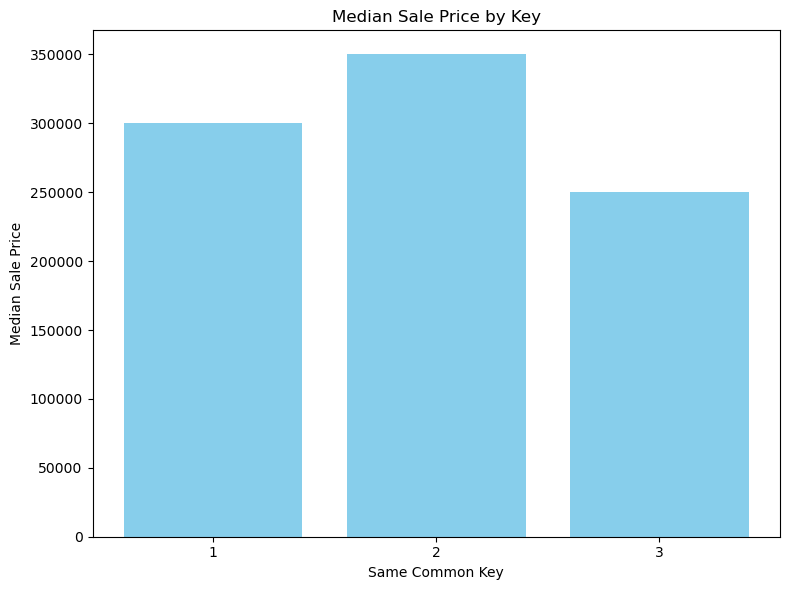

In [61]:
# Bar Chart - Median Sale Price
plt.figure(figsize=(8, 6))
plt.bar(median_sale_price_data["same_common_key"], median_sale_price_data["Median_Sale_Price"], color='skyblue')
plt.title('Median Sale Price by Key')
plt.xlabel('Same Common Key')
plt.ylabel('Median Sale Price')
plt.xticks(median_sale_price_data["same_common_key"])
plt.tight_layout()
plt.show()

# Bar Chart - Median Sale Price

### Definition:
The bar chart visualizes the **Median Sale Price** for different categories or keys, providing insights into property pricing trends.

### Purpose:
- **Price Comparison**: Helps to compare median sale prices across different regions or groups.
- **Market Trends**: Highlights variations in property prices, useful for market analysis.

### How This Chart Was Created:
The chart uses the following data:
- `median_sale_price_data["some_common_key"]`: Represents the categories or keys on the x-axis.
- `median_sale_price_data["Median_Sale_Price"]`: Represents the median sale prices on the y-axis.
- A sky-blue color palette is applied for visual clarity.

The chart's layout and appearance were refined using:
- `plt.title()`: Adds a title to the chart.
- `plt.xlabel()` and `plt.ylabel()`: Label the axes for better understanding.
- `plt.xticks()`: Configures x-axis labels to display relevant keys.
- `plt.tight_layout()`: Ensures proper spacing and alignment.

### Why It Matters:
This visualization is essential for understanding real estate price distributions:
- **Decision-Making**: Assists investors in identifying regions with favorable pricing.
- **Trend Analysis**: Reveals pricing patterns over differen"])
plt.tight_layout()
plt.show()


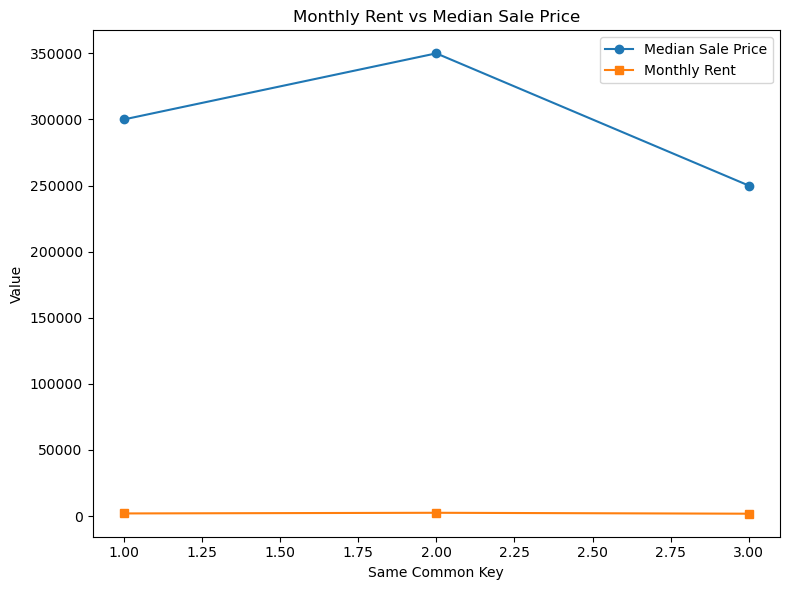

In [64]:
# Line Chart - Monthly Rent vs Median Sale Price
plt.figure(figsize=(8, 6))
plt.plot(median_sale_price_data["same_common_key"], median_sale_price_data["Median_Sale_Price"], label="Median Sale Price", marker='o')
plt.plot(zordi_data["same_common_key"], zordi_data["Monthly_Rent"], label="Monthly Rent", marker='s')
plt.title('Monthly Rent vs Median Sale Price')
plt.xlabel('Same Common Key')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

# Line Chart - Monthly Rent vs Median Sale Price

### Definition:
This chart compares the trends of **Median Sale Price** and **Monthly Rent** over a common key (e.g., time or a region).

### Purpose:
- **Median Sale Price**: Represents the midpoint of home sale prices in a region, showing the market value of properties.
- **Monthly Rent**: Indicates the average rental income potential in the same region.

### Insights Provided:
1. **Price vs. Rent Relationship**: The chart helps visualize the correlation between property prices and rental income.
2. **Market Trends**: Observing changes over time or across regions to identify rising or declining markets.
3. **Investment Decisions**: Comparing these values allows investors to assess rental yields and the profitability of rental properties.

### How These Data Were Used:
- **Median Sale Price**: Derived from the `median_sale_price_data` dataset.
- **Monthly Rent**: Derived from the `zordi_data` dataset.
- Both datasets are aligned using a common key (e.g., a date or region) for meaningful comparison.

### Why It Matters:
This visualization combines sale price and rent data to provide:
- **Market Dynamics**: Identifying areas where rising prices are matched with increasing rents.
- **Investment Strategy**: Helps in determining whether a market is more favorable for property apprecia)
plt.tight_layout()
plt.show()

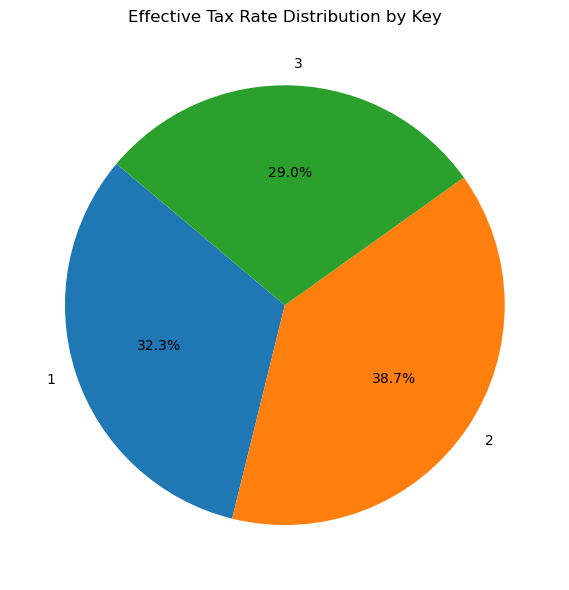

In [67]:
# Pie Chart - Effective Tax Rate Distribution
plt.figure(figsize=(8, 6))
plt.pie(property_tax_data["Effective_Tax_Rate"], labels=property_tax_data["same_common_key"], autopct='%1.1f%%', startangle=140)
plt.title('Effective Tax Rate Distribution by Key')
plt.tight_layout()
plt.show()

### Effective Tax Rate Distribution

**Definition**:  
The pie chart visualizes the distribution of effective tax rates across various categories or keys.

**Purpose**:  
- **Tax Burden Analysis**: Understand how tax rates vary among different categories.  
- **Comparative Insights**: Highlight which categories bear higher or lower effective tax rates.

---

### How the Chart Was Created  
The chart is generated using data from the `property_tax_data` dataset:  
- The `Effective_Tax_Rate` column represents the percentage of the total tax burden for each key.
- The `some_common_key` column provides the labels for each slice of the pie chart.

---
---
---

In [70]:
# Rental Income Expectation and Market Insights

### Rental Income Expectation and Market Insights

#### Monthly Income Expectation Calculation
This calculation estimates the average monthly rental income after considering mortgage payments, property taxes, and rental income for properties.

**What It Calculates**:
- **Monthly Mortgage**: Based on the median sale price of properties and a standard loan calculation.
- **Monthly Property Taxes**: Derived from the effective tax rate and the property's median sale price.
- **Net Monthly Income**: Calculated as rental income minus mortgage payments and property taxes.

**Purpose**:
To provide a clear picture of the profitability of rental investments after accounting for major expenses.
"""

# Visualization 1: Median Sale Price by Key

---

#### Bar Chart - Median Sale Price
**What It Shows**:  
This chart represents the median sale price of properties for each category or key.

**Key Insights**:
- **Market Strength**: Higher bars indicate regions with higher property values.
- **Comparison**: Visualize which categories have more expensive properties.
"""

# Visualization 2: Monthly Rent vs Median Sale Price

---

#### Line Chart - Monthly Rent vs Median Sale Price
**What It Shows**:  
This chart compares monthly rent and median sale prices across categories.

**Key Insights**:
- **Profitability Indicators**: Higher rent relative to sale price suggests better rental yield potential.
- **Trends**: Identifies which categories balance property value and rental income.

# Visualization 3: Effective Tax Rate Distribution

---

#### Pie Chart - Effective Tax Rate Distribution by Key
**What It Shows**:  
This pie chart highlights the proportion of effective tax rates across categories.

**Key Insights**:
- **Tax Burden Comparison**: Quickly identify categories with the highest and lowest tax burdens.
- **Regional Impacts**: Understand how property taxes vary and their influence on profitability.

---

### Why These Visuals and Calculations Matter

#### Investment Insights:
- Identify categories with better rental income potential.
- Evaluate regions with balanced sale prices and rental income.

#### Tax Considerations:
- Higher effective tax rates reduce profitability but may reflect high-value regions.

#### Market Strategy:
- Combine the insights from rent-to-sale price ratios and tax impacts to pinpoint ideal investment areas.

#### Conclusion:
The combined analysis of rental income, sale prices, and tax rates helps investors make informed decisions by evaluating profitability and regional trends. By focusing on markets with strong rental yields, manageable taxes, and affordable property values, investors can optimize their returns.

SyntaxError: unterminated string literal (detected at line 10) (288142286.py, line 10)